<h1 style="color: black; font-size: 24px; font-weight: bold;">1. Imports and Initial Setup</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sn
import geopandas as gpd
from shapely.geometry import Point
import geopandas.tools

<h1 style="color: black; font-size: 24px; font-weight: bold;">2. Load Crime Data</h1>

In [2]:
crime_data = pd.read_csv("/Users/ridhi/Desktop/Crime_Data_from_2020_to_Present (1).csv")  # Update the path

# Load traffic data
traffic_data = pd.read_csv("/Users/ridhi/Desktop/Motor_Vehicle_Collisions_-_Crashes (1).csv", low_memory=False)  # Update the path

# Display first few rows to confirm load
print("Crime Data:")
print(crime_data.head())
print("\nTraffic Data:")
print(traffic_data.head())

Crime Data:
       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2    

<h1 style="color: black; font-size: 24px; font-weight: bold;">3. extract the Data</h1>

In [3]:
def extract_data(crime_file_path, traffic_file_path):
    crime_data = pd.read_csv(crime_file_path)
    traffic_data = pd.read_csv(traffic_file_path, low_memory=False)
    return crime_data, traffic_data

<h1 style="color: black; font-size: 24px; font-weight: bold;">4. Transform the data</h1>

In [4]:
def transform_data(crime_data, traffic_data):
    # Drop unnecessary columns in crime data
    crime_data = crime_data.drop(columns=['Crm Cd 3', 'Crm Cd 4'])
    
    # Handle missing values in crime data
    crime_data['Mocodes'].fillna('Unknown', inplace=True)
    crime_data['Vict Sex'].fillna('Unknown', inplace=True)
    crime_data['Vict Descent'].fillna('Unknown', inplace=True)
    crime_data['Weapon Used Cd'].fillna(0, inplace=True)
    crime_data['Weapon Desc'].fillna('No weapon', inplace=True)
    
    # Standardize column names
    crime_data.columns = crime_data.columns.str.lower().str.replace(' ', '_')
    
    # Convert 'date_occ' to datetime and extract components
    crime_data['date_occ'] = pd.to_datetime(crime_data['date_occ'], errors='coerce')
    crime_data['year'] = crime_data['date_occ'].dt.year
    crime_data['month'] = crime_data['date_occ'].dt.month
    crime_data['day'] = crime_data['date_occ'].dt.day
    crime_data['hour'] = crime_data['time_occ'] // 100
    crime_data['is_weekend'] = crime_data['date_occ'].dt.weekday >= 5
    
    # Convert 'CRASH DATE' in traffic data to datetime
    traffic_data['CRASH DATE'] = pd.to_datetime(traffic_data['CRASH DATE'], errors='coerce')
    
    # Filter traffic data to remove rows with missing latitude and longitude
    traffic_data = traffic_data.dropna(subset=['LATITUDE', 'LONGITUDE'])
    
    # Merge the datasets on date and geolocation
    merged_data = pd.merge(
        crime_data,
        traffic_data,
        how='inner',
        left_on=['date_occ', 'lat', 'lon'],
        right_on=['CRASH DATE', 'LATITUDE', 'LONGITUDE']
    )
    
    return merged_data

<h1 style="color: black; font-size: 24px; font-weight: bold;">5. Load the data</h1>

In [5]:
def load_data(merged_data, output_file_path):
    merged_data.to_csv(output_file_path, index=False)
    print(f"Data successfully saved to {output_file_path}")

 <h1 style="color: black; font-size: 24px; font-weight: bold;">6. Run the ETL Pipeline</h1>

In [6]:
def run_pipeline(crime_file_path, traffic_file_path, output_file_path):
    # Extract
    crime_data, traffic_data = extract_data(crime_file_path, traffic_file_path)
    
    # Transform
    merged_data = transform_data(crime_data, traffic_data)
    
    # Load
    load_data(merged_data, output_file_path)
    
    print("ETL Pipeline completed successfully")

 <h1 style="color: black; font-size: 24px; font-weight: bold;">7. File Paths</h1>

In [7]:
crime_file_path = "/Users/ridhi/Desktop/Crime_Data_from_2020_to_Present (1).csv"
traffic_file_path = "/Users/ridhi/Desktop/Motor_Vehicle_Collisions_-_Crashes (1).csv"
output_file_path = "/Users/ridhi/Desktop/final_crime_data.csv"

# Execute the ETL Pipeline
run_pipeline(crime_file_path, traffic_file_path, output_file_path)

Data successfully saved to /Users/ridhi/Desktop/final_crime_data.csv
ETL Pipeline completed successfully


 <h1 style="color: black; font-size: 24px; font-weight: bold;">8. Exploring Merged Data </h1>


In [8]:
merged_data = pd.read_csv("/Users/ridhi/Desktop/final_crime_data.csv")
merged_data.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1-2,crm_cd,crm_cd_desc,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,NaN,4304457,Sedan,NaN,NaN,NaN,NaN
1,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Unspecified,Unspecified,NaN,NaN,4305057,Sedan,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
2,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,NaN,4304618,Sedan,NaN,NaN,NaN,NaN
3,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,NaN,NaN,4304781,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
4,201808884,03/29/2020 12:00:00 AM,2020-03-29,1430,18,Southeast,1823,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Unspecified,NaN,NaN,NaN,4304379,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN


  <h1 style="color: black; font-size: 24px; font-weight: bold;">9. Monthly and Hourly Crime Trends </h1>


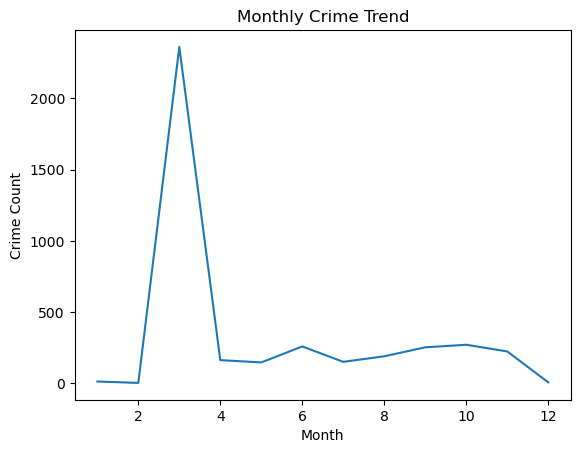

In [9]:
monthly_trend = merged_data.groupby('month').size()
monthly_trend.plot(kind='line', title="Monthly Crime Trend")
pt.xlabel("Month")
pt.ylabel("Crime Count")
pt.show()

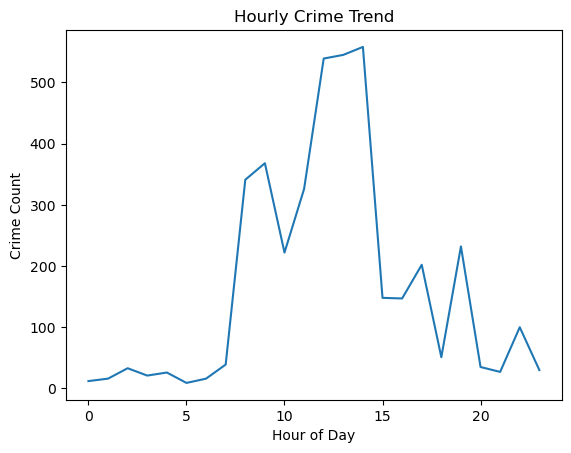

In [10]:
hourly_trend = merged_data.groupby('hour').size()
hourly_trend.plot(kind='line', title="Hourly Crime Trend")
pt.xlabel("Hour of Day")
pt.ylabel("Crime Count")
pt.show()

  <h1 style="color: black; font-size: 24px; font-weight: bold;">10. Top 5 Crime Hotspots  </h1>


In [31]:
top_locations = merged_data['location'].value_counts().head(5)
print("Top 5 Crime Hotspots:\n", top_locations)

Top 5 Crime Hotspots:
 9500    LAUREL CANYON                BL    121
6800    HOLLYWOOD                    BL     93
800 N  ALAMEDA                      ST      72
3100    FOLSOM                       ST     65
600 W  7TH                          ST      65
Name: location, dtype: int64


   <h1 style="color: black; font-size: 24px; font-weight: bold;">11. Crime and Traffic Incidents by City </h1>


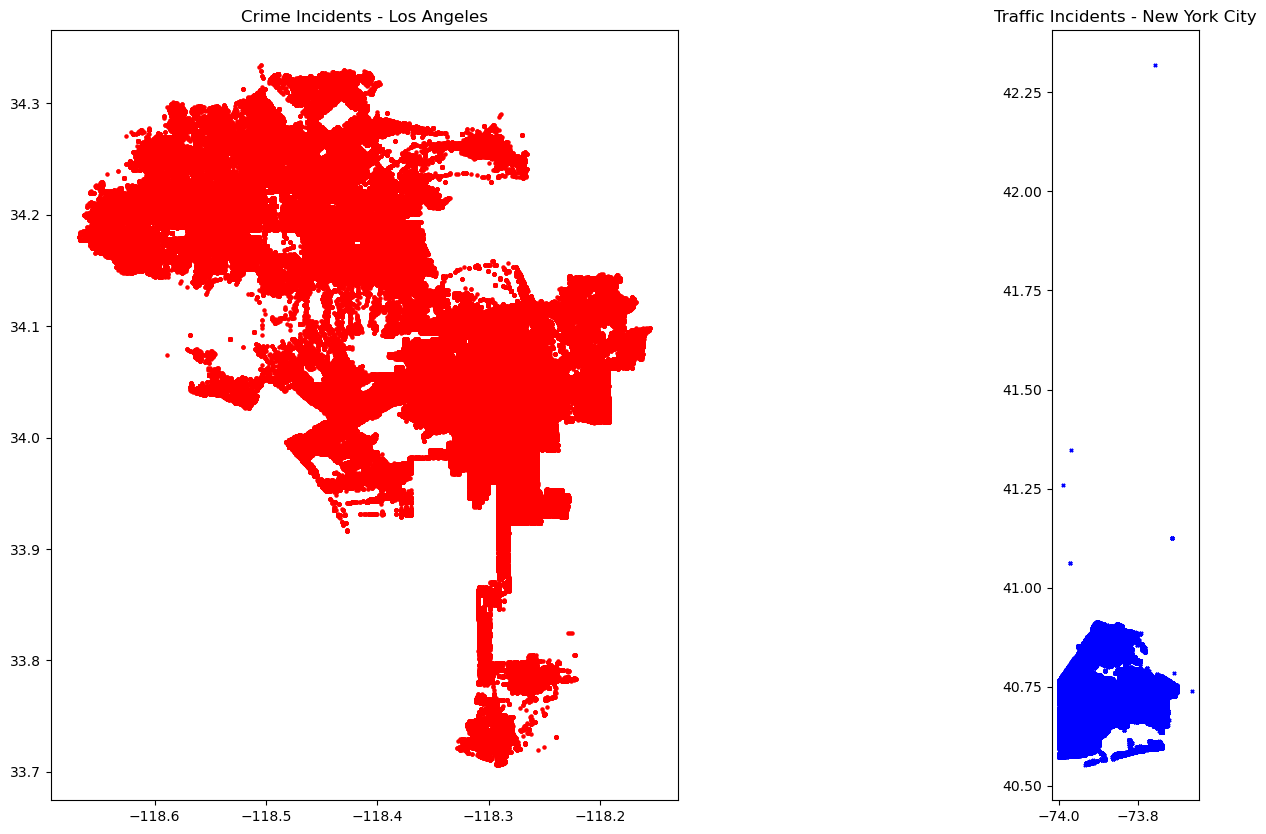

In [12]:
# Separate datasets based on longitude
crime_data_la = crime_data[(crime_data['LON'] < -118) & (crime_data['LON'] > -119)]
traffic_data_nyc = traffic_data[(traffic_data['LONGITUDE'] < -73) & (traffic_data['LONGITUDE'] > -74)]

# Create GeoDataFrames
crime_gdf_la = gpd.GeoDataFrame(
    crime_data_la, geometry=gpd.points_from_xy(crime_data_la.LON, crime_data_la.LAT)
)
traffic_gdf_nyc = gpd.GeoDataFrame(
    traffic_data_nyc, geometry=gpd.points_from_xy(traffic_data_nyc.LONGITUDE, traffic_data_nyc.LATITUDE)
)

# Plot LA Crime Data
fig, ax = pt.subplots(1, 2, figsize=(18, 10))

crime_gdf_la.plot(ax=ax[0], marker='o', color='red', markersize=5)
ax[0].set_title("Crime Incidents - Los Angeles")

# Plot NYC Traffic Data
traffic_gdf_nyc.plot(ax=ax[1], marker='x', color='blue', markersize=5)
ax[1].set_title("Traffic Incidents - New York City")

pt.show()


   <h1 style="color: black; font-size: 24px; font-weight: bold;">12. Filtered Top 5 Crime Hotspots in Los Angeles </h1>


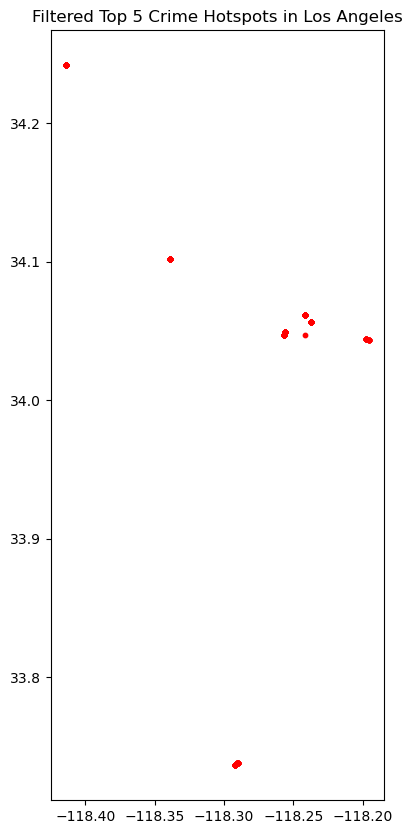

In [23]:

# Define approximate latitude and longitude range for Los Angeles
lat_min, lat_max = 33.5, 34.5
lon_min, lon_max = -119, -117

# Filter crime_data_top_locations based on LA latitude and longitude ranges
crime_data_top_locations_filtered = crime_data_top_locations[
    (crime_data_top_locations['LAT'] >= lat_min) & (crime_data_top_locations['LAT'] <= lat_max) &
    (crime_data_top_locations['LON'] >= lon_min) & (crime_data_top_locations['LON'] <= lon_max)
]

# Create a GeoDataFrame for the filtered top locations
crime_gdf_top_filtered = gpd.GeoDataFrame(
    crime_data_top_locations_filtered, geometry=gpd.points_from_xy(crime_data_top_locations_filtered.LON, crime_data_top_locations_filtered.LAT)
)

# Plot the filtered top 5 crime locations on a map
fig, ax = pt.subplots(figsize=(10, 10))
crime_gdf_top_filtered.plot(ax=ax, marker='o', color='red', markersize=10)
ax.set_title("Filtered Top 5 Crime Hotspots in Los Angeles")
pt.show()

   <h1 style="color: black; font-size: 24px; font-weight: bold;">13. Top Crime Categories by Hour of Day and Area </h1>

Top 10 Crime Categories:
 BATTERY - SIMPLE ASSAULT                           892
TRESPASSING                                        812
INTIMATE PARTNER - SIMPLE ASSAULT                  453
THEFT PLAIN - PETTY ($950 & UNDER)                 209
VIOLATION OF RESTRAINING ORDER                     199
VIOLATION OF COURT ORDER                           125
ARSON                                              125
BATTERY WITH SEXUAL CONTACT                        124
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)    107
OTHER MISCELLANEOUS CRIME                          105
Name: crm_cd_desc, dtype: int64


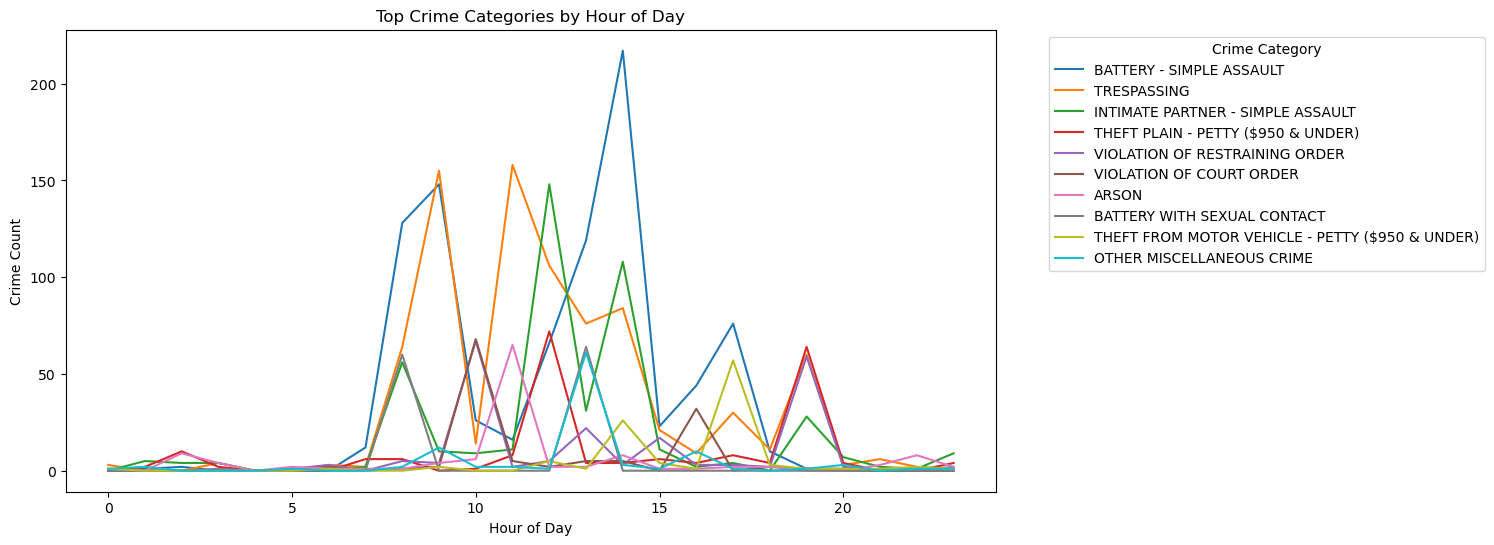

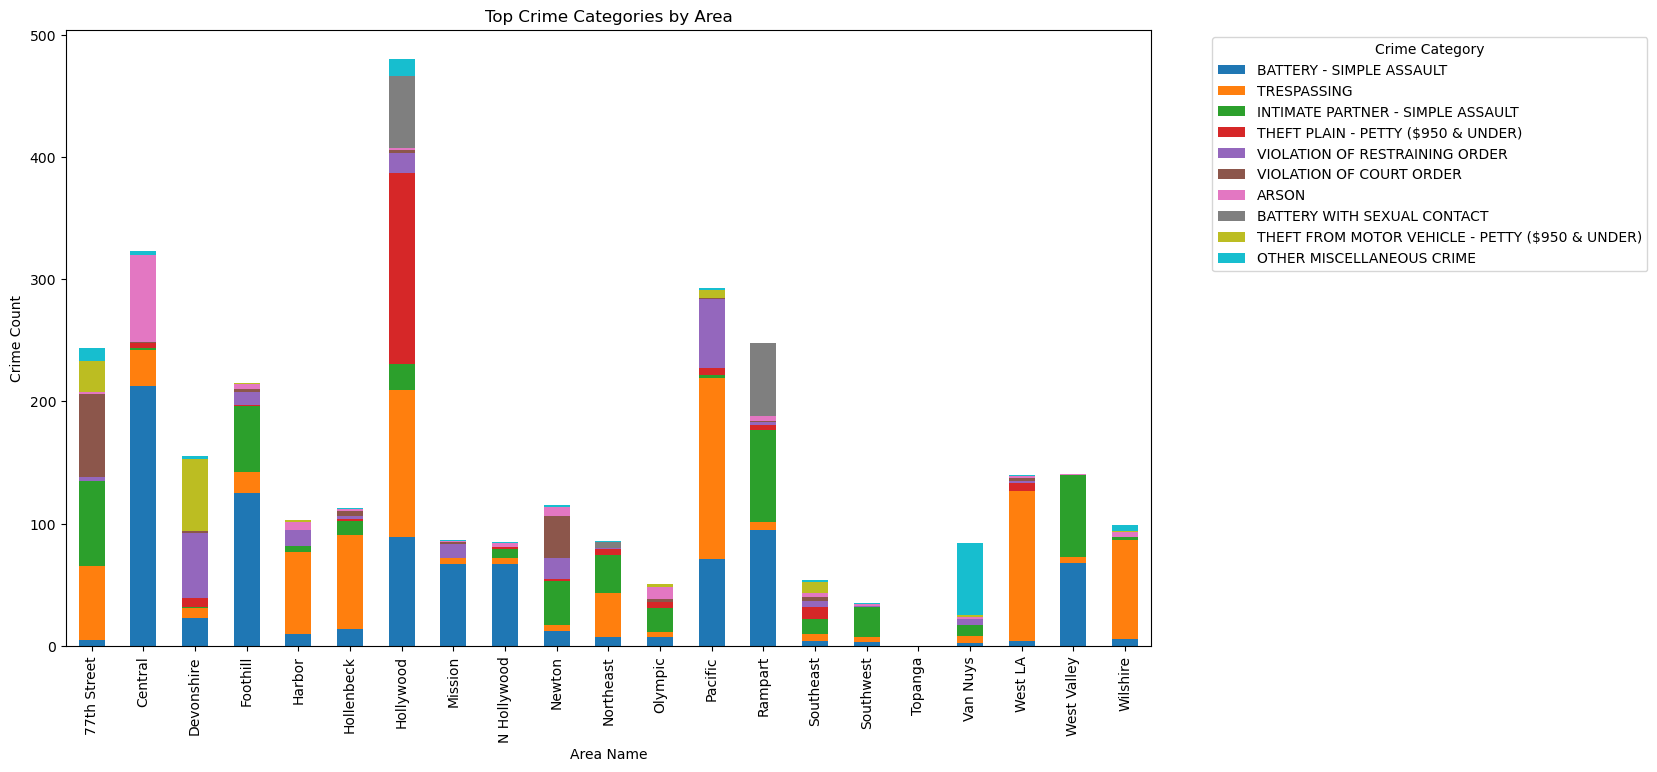

In [13]:
# Find the top 10 most common crime categories
top_crime_categories = merged_data['crm_cd_desc'].value_counts().head(10)
print("Top 10 Crime Categories:\n", top_crime_categories)

# Crime categories by hour of day
crime_by_hour = merged_data.groupby(['hour', 'crm_cd_desc']).size().unstack().fillna(0)
crime_by_hour[top_crime_categories.index].plot(kind='line', figsize=(12, 6))
pt.title("Top Crime Categories by Hour of Day")
pt.xlabel("Hour of Day")
pt.ylabel("Crime Count")
pt.legend(title="Crime Category", bbox_to_anchor=(1.05, 1), loc='upper left')
pt.show()

# Crime categories by area (if area_name is available)
if 'area_name' in merged_data.columns:
    crime_by_area = merged_data.groupby(['area_name', 'crm_cd_desc']).size().unstack().fillna(0)
    top_crime_categories_area = crime_by_area[top_crime_categories.index]
    top_crime_categories_area.plot(kind='bar', stacked=True, figsize=(14, 8))
    pt.title("Top Crime Categories by Area")
    pt.xlabel("Area Name")
    pt.ylabel("Crime Count")
    pt.legend(title="Crime Category", bbox_to_anchor=(1.05, 1), loc='upper left')
    pt.show()

   <h1 style="color: black; font-size: 24px; font-weight: bold;">14. Top 2 Crime Categories by Location in Los Angeles </h1>

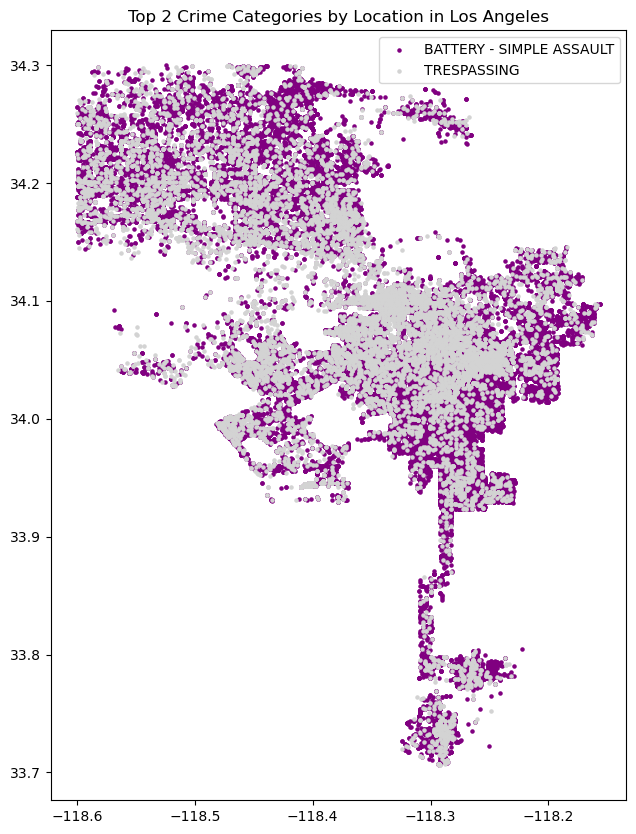

In [30]:
# Define the top 2 crime categories
top_2_categories = [
    'BATTERY - SIMPLE ASSAULT', 
    'TRESPASSING'
]

# Filter the data for these top 2 crime categories
crime_data_top_2_categories = crime_data[
    crime_data['Crm Cd Desc'].isin(top_2_categories)
]

# Set latitude and longitude ranges for Los Angeles
lat_min, lat_max = 33.7, 34.3
lon_min, lon_max = -118.6, -118.1

# Further filter by Los Angeles latitude and longitude range
crime_data_top_2_filtered = crime_data_top_2_categories[
    (crime_data_top_2_categories['LAT'] >= lat_min) & (crime_data_top_2_categories['LAT'] <= lat_max) &
    (crime_data_top_2_categories['LON'] >= lon_min) & (crime_data_top_2_categories['LON'] <= lon_max)
]

# Create a GeoDataFrame for plotting
crime_gdf_top_2 = gpd.GeoDataFrame(
    crime_data_top_2_filtered, geometry=gpd.points_from_xy(crime_data_top_2_filtered.LON, crime_data_top_2_filtered.LAT)
)

# Plot each category with a different color
fig, ax = pt.subplots(figsize=(10, 10))
colors = ['purple', 'lightgray']  # Use light colors to keep the plot clean

for i, category in enumerate(top_2_categories):
    category_gdf = crime_gdf_top_2[crime_gdf_top_2['Crm Cd Desc'] == category]
    category_gdf.plot(ax=ax, marker='o', color=colors[i], markersize=5, label=category)

ax.set_title("Top 2 Crime Categories by Location in Los Angeles")
pt.legend()
pt.show()

   <h1 style="color: black; font-size: 24px; font-weight: bold;">15. Crime Distribution Heatmap (Day vs. Hour)  </h1>

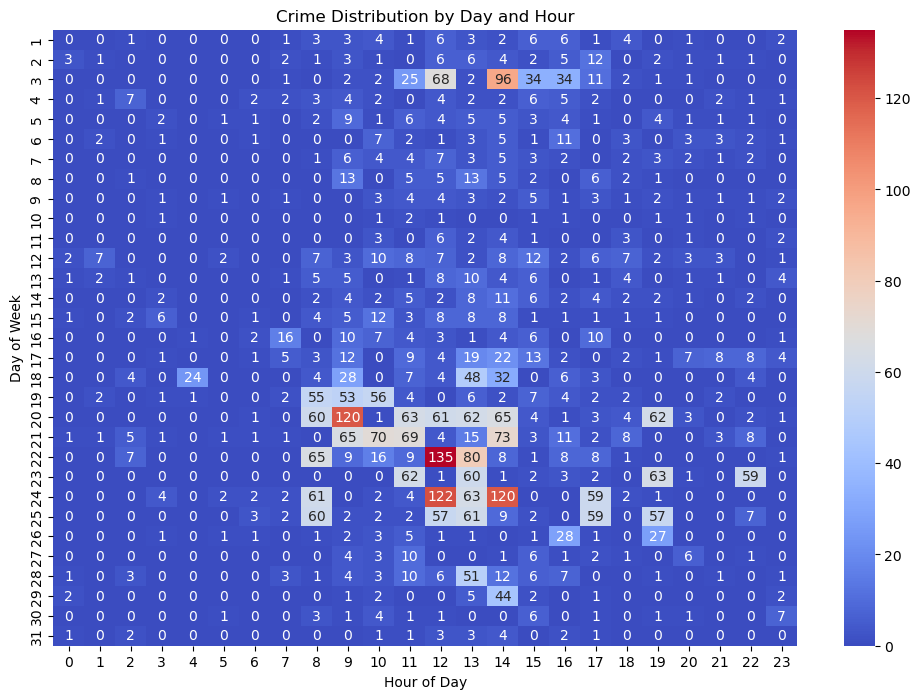

In [14]:
# Create a heatmap for day of the week and hour distribution
pt.figure(figsize=(12, 8))
sn.heatmap(pd.crosstab(merged_data['day'], merged_data['hour']), cmap="coolwarm", annot=True, fmt="d")
pt.xlabel("Hour of Day")
pt.ylabel("Day of Week")
pt.title("Crime Distribution by Day and Hour")
pt.show()


  <h1 style="color: black; font-size: 24px; font-weight: bold;">16.Yearly Crime Trend   </h1>

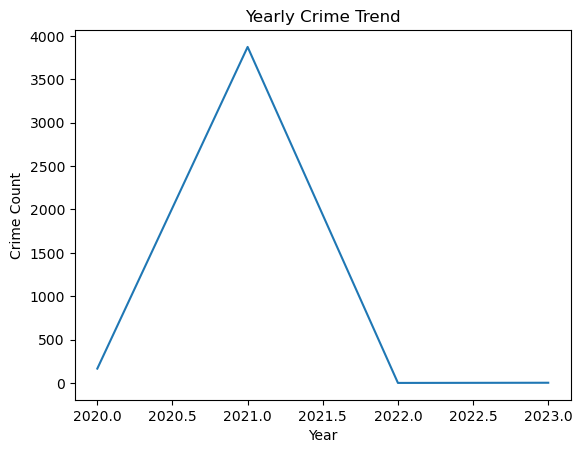

In [16]:
yearly_trend = merged_data.groupby('year').size()
yearly_trend.plot(kind='line', title="Yearly Crime Trend")
pt.xlabel("Year")
pt.ylabel("Crime Count")
pt.show()